# Exploring the Example Dataset

In [13]:
import sys  
sys.path.insert(0, '../telescopeML/')

from StatVisAnalyzer import *

# Step 1: Load the dataset

In [14]:
# original dataset
df=pd.read_csv('../../datasets/browndwarf_R100_v4_newWL_v2.csv.bz2', compression='bz2')
df.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


In [3]:
df['is_augmented'].value_counts()

no    30888
Name: is_augmented, dtype: int64

In [4]:
wl = pd.read_csv('../../datasets/wl.csv')
wl.head(5)

,wl
0,2.511960
1,2.486966
2,2.462220
3,2.437720
4,2.413464


In [12]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import ColorBar

def plot_multiple_y_against_single_x(df, x_column, y_columns, title):
    """
    Plot multiple y-columns against a single x-column from a DataFrame.

    Parameters:
        - df (pd.DataFrame): DataFrame containing the data to be plotted.
        - x_column (str): Column name to be used as x-values for all lines.
        - y_columns (list): List of column names to be used as y-values for each line.
        - title (str): Title for the plot.
    """
    
    mapper = linear_cmap(field_name='y', palette=Viridis256, low=min(df['y']), high=max(df['y']))


    # Create a Bokeh figure
    p = figure(title=title, x_axis_label='X-axis', y_axis_label='Y-axis', width=800, height=400)

    # Plot each line (y-column) against the same x-column
    for y_column in y_columns:
        p.line(df[x_column], df[y_column], line_width=2, legend_label=y_column, line_alpha=0.8)

    # Show the legend
    p.legend.click_policy = "hide"
    
    # Add a colorbar to the plot
    color_bar = ColorBar(color_mapper=mapper['transform'], width=8, location=(0, 0))
    p.add_layout(color_bar, 'right')
    
    # Show the plot
    show(p)

# Sample DataFrame with multiple y columns and a single x column
data = { 'x': [1, 2, 3, 4, 5],
        'y1': [5, 7, 2, 8, 6],
        'y2': [3, 6, 1, 4, 7],
        'y3': [2, 4, 3, 1, 5]}
df = pd.DataFrame(data)

# Define the x column and y column names for each line
x_column = 'x'
y_columns = ['y1', 'y2', 'y3']

# Call the function to plot the DataFrame with multiple y columns against a single x column
plot_multiple_y_against_single_x(df, x_column, y_columns, title='Multiple Y Columns Plot')


NameError: name 'linear_cmap' is not defined

In [72]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

def plot_dataframe_lines(dataset_df, title):
    """
    Plot a DataFrame with 'x' and 'y' columns using lines in Bokeh.

    Parameters:
        - df (pd.DataFrame): DataFrame containing the data to be plotted.
        - title (str): Title for the plot.
    """

    # Create a ColumnDataSource from the DataFrame
    # source = ColumnDataSource(dataset_df)
    mapper = linear_cmap(field_name='y', palette=Viridis256, low=min(df['y']), high=max(df['y']))


    # Create a Bokeh figure
    p = figure(title=title, x_axis_label='X-axis', y_axis_label='Y-axis', width=800, height=400)

    # Plot the data as lines
    for i in range(len(filtered_df2)):
        p.line(filtered_df2.columns.to_numpy().astype(np.float64), 
               filtered_df2.iloc[i].to_numpy(), line_width=2, line_color='blue', legend_label='Data')

    # Add a colorbar to the plot
    color_bar = ColorBar(color_mapper=mapper['transform'], width=8, location=(0, 0))
    p.add_layout(color_bar, 'right')
    
    # Show the plot
    show(p)


In [73]:
df

,x,y1,y2,y3
0,1,5,3,2
1,2,7,6,4
2,3,2,1,3
3,4,8,4,1
4,5,6,7,5


In [114]:
# Define the filter bounds
filter_bounds = {'gravity': (5.,5), 
                 'c_o_ratio' : (0.5,0.5),
                 'metallicity' : (0.0,0.0),
                 'temperature': (600, 1200)}

feature_to_plot = 'temperature'

In [115]:
filtered_df = df.copy()
for feature, bounds in filter_bounds.items():
    lower_bound, upper_bound = bounds
    filtered_df = filtered_df[(filtered_df[feature] >= lower_bound) & (filtered_df[feature] <= upper_bound)]

filtered_df2 = filtered_df.sort_values(feature_to_plot, ascending = False).iloc[::1,4:-1][::-1] 

KeyError: 'gravity'

In [76]:
filtered_df2.iloc[0]

2.512    2.736539e-09
2.487    3.942575e-09
2.462    4.527232e-09
2.438    3.222585e-09
2.413    2.159112e-09
             ...     
0.933    6.382583e-10
0.924    1.593480e-09
0.915    1.514908e-09
0.906    1.244148e-09
0.897    7.370705e-10
Name: 12544, Length: 104, dtype: float64

In [77]:
plot_dataframe_lines(filtered_df2, title = 'test')

NameError: name 'linear_cmap' is not defined

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
# matplotlib.rcParams['font.family'] = 'Arial'


def plot_filtered_dataframe(dataset, filter_bounds, feature_to_plot, title_label):
    """
    Plot a DataFrame with a single x-axis (using column names) and multiple y-axes.

    Parameters:
        - df (pd.DataFrame): DataFrame containing the data to be plotted.
    """

    
    filtered_df = dataset.copy()
    for feature, bounds in filter_bounds.items():
        lower_bound, upper_bound = bounds
        filtered_df = filtered_df[(filtered_df[feature] >= lower_bound) & (filtered_df[feature] <= upper_bound)]
        
    filtered_df2 = filtered_df.sort_values(feature_to_plot, ascending = False).iloc[::1,4:-1][::-1] 
    fig, ax = plt.subplots(figsize=(10, 3))

    x = filtered_df2.columns
    df_transposed = filtered_df2.T  # Transpose the DataFrame

    # Define a color palette
    num_colors = len(df_transposed.columns)   # Number of colors needed (excluding x-axis)
    colors = sns.color_palette('magma', num_colors)

    for i, col in enumerate(df_transposed.columns):
        # print(col)
        if col != 'x':  # Skip the x-axis column
            ax.semilogy(wl.wl, df_transposed[col], 
                        # label=data[col][:4].values, 
                        color=colors[i], alpha = 0.7)
    # print(filtered_data.T[col][:4].values[0])
    # ax.set_xlabel('Wavelength  [$\mu$m]')
    # ax.set_ylabel(r'F$_{\nu}$  [erg/cm$^2$/s/Hz]')
    # dict_features = {'temperature':'Temperature', 'gravity':'gravity', 'metallicity':'metallicity', 'c_o_ratio':'C/O ratio'}
    # ax.set_title('Augmented '+dict_features[feature_to_plot]+" dataset "+title_label)
    # ax.legend()

    # Get the minimum and maximum values from the data
    # vmin = df_transposed.values.min()
    # vmax = df_transposed.values.max()

    # Add colorbar
    cmap = sns.color_palette('magma', as_cmap=True)
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, 
            norm=plt.Normalize(vmin=filter_bounds[feature_to_plot][0], vmax=filter_bounds[feature_to_plot][1])), ax=ax)
    # dict_features2 = {'temperature':'T [K]', 'gravity':'log$g$', 'metallicity':'[M/H]', 'c_o_ratio':'C/O ratio'}
    # cbar.set_label(dict_features2[feature_to_plot])
    
    # plt.savefig('../../outputs/regression/figures/'+'Augmented_'+feature_to_plot+"_dataset.pdf", dpi=500, bbox_inches='tight')
    
    
    
    plt.show()


In [6]:
# Define the filter bounds
filter_bounds = {'gravity': (5.,5), 
                 'c_o_ratio' : (0.5,0.5),
                 'metallicity' : (0.0,0.0),
                 'temperature': (600, 1200)}

# Call the function to filter the dataset
plot_filtered_dataframe(df[df['is_augmented'].isin(
                                    ['GuassErr_std0.01',
                                     'GuassErr_std0.02',
                                     'GuassErr_std0.1',
                                     'no'])], 
                                       filter_bounds,
                                       'temperature',
                                     title_label = '[log$g$='+str(filter_bounds['gravity'][0])+
                                    ', C/O ='+str(filter_bounds['c_o_ratio'][0])+
                                    ', [M/H]='+str(filter_bounds['metallicity'][0])+
                        ']')

ValueError: Failed to find font DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0, and fallback to the default font was disabled

<Figure size 1000x300 with 2 Axes>

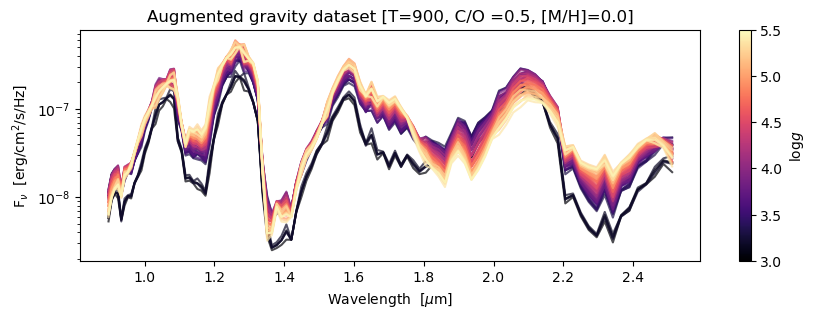

In [236]:
# Define the filter bounds
filter_bounds = {'gravity': (3,5.5), 
                 'c_o_ratio' : (0.5,0.5),
                 'metallicity' : (0.0,0.0),
                 'temperature': (900, 900)}

# Call the function to filter the dataset
plot_filtered_dataframe(df[df['is_augmented'].isin(
                                    ['GuassErr_std0.01',
                                     'GuassErr_std0.02',
                                     'GuassErr_std0.1',
                                     'no'])], 
                                       filter_bounds,
                                       'gravity',                                     
                        title_label = '[T='+str(filter_bounds['temperature'][0])+
                                    ', C/O ='+str(filter_bounds['c_o_ratio'][0])+
                                    ', [M/H]='+str(filter_bounds['metallicity'][0])+
                        ']')

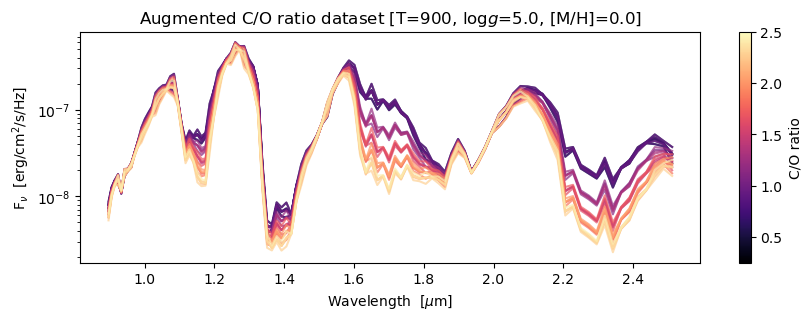

In [237]:
# Define the filter bounds
filter_bounds = {'gravity': (5.,5), 
                 'c_o_ratio' : (0.25,2.5),
                 'metallicity' : (0.0,0.0),
                 'temperature': (900, 900)}

# Call the function to filter the dataset
plot_filtered_dataframe(df[df['is_augmented'].isin(
                                    ['GuassErr_std0.01',
                                     'GuassErr_std0.02',
                                     'GuassErr_std0.1',
                                     'no'])], 
                                       filter_bounds,
                                       'c_o_ratio',                                     
                        title_label = '[T='+str(filter_bounds['temperature'][0])+
                                    ', log$g$='+str(filter_bounds['gravity'][0])+
                                    ', [M/H]='+str(filter_bounds['metallicity'][0])+
                        ']')

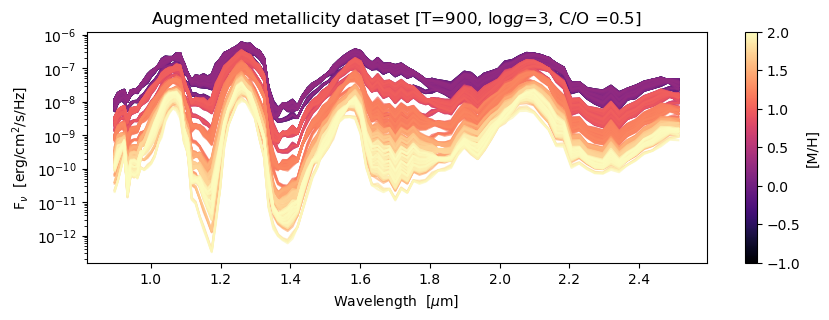

In [238]:
# Define the filter bounds
filter_bounds = {'gravity': (3,5.5), 
                 'c_o_ratio' : (0.5,0.5),
                 'metallicity' : (-1.,2.),
                 'temperature': (900, 900)}

# Call the function to filter the dataset
plot_filtered_dataframe(df[df['is_augmented'].isin(
                                    ['GuassErr_std0.01',
                                     'GuassErr_std0.02',
                                     'GuassErr_std0.1',
                                     'no'])], 
                                       filter_bounds,
                                       'metallicity',                                     
                        title_label = '[T='+str(filter_bounds['temperature'][0])+
                                    ', log$g$='+str(filter_bounds['gravity'][0])+
                                    ', C/O ='+str(filter_bounds['c_o_ratio'][0])+
                        ']')